# An Analysis of Koala Hospital Dataset Using Python

<p align="center" style="background-color: black;">
  <img src="/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /AT1/Assignment 1- individual/koala w2.jpeg" alt="Koala">
</p>


Koalas, one of Australia's most iconic and beloved marsupials, face a precarious future. In 2012, the Australian government officially declared koalas as vulnerable and listed them as a threatened species, highlighting the urgent need for concerted conservation efforts (Quigley & Timms, 2020). Against this backdrop, the importance of exploratory data analysis (EDA) on koala populations cannot be overstated, mainly when focused on identifying the reasons for their death and injury. Such an analysis is invaluable for organizations dedicated to wildlife preservation, as it provides critical insights that can shape effective conservation strategies and inform policy decisions. By dissecting the factors contributing to koala mortality and injuries, the research aids in developing targeted interventions that contribute to the broader scientific understanding of koala ecology and support the mobilization of resources and public awareness towards their protection.

<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>1. Data Collection</strong>
</div>


In [2]:
#import libraries
import pandas as pd
import numpy as np
import pandas as pd
import missingno as msno

In [4]:
#Load the data into a DataFrame
# data for years 2016-2022
df16=pd.read_excel("/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /Assignment 1- individual/koalabase_2016-2022  copy.xlsx")
# data for years 2022-2023
df23=pd.read_excel("/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /Assignment 1- individual/koalas_2022-2023 copy.xlsx")


<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>2. Merging Datasets</strong>
</div>


Merging dataset in order to have data from year 2016 till 2023.

In [6]:
#Check the shape of dfs before merging them 
df16_shape= df16.shape #2016-2022 data
df23_shape= df23.shape #2022-2023 data

print("df16 shape=", df16_shape)
print("df23 shape=", df23_shape)


df16 shape= (9092, 41)
df23 shape= (1218, 37)


In [7]:
# Find columns in df16 that are not in df23
not_matched_columns_df16 = df16.columns.difference(df23.columns)
print("Columns in df16 not in df23:", not_matched_columns_df16)

# Find columns in df23 that are not in df16
not_matched_columns_df23 = df23.columns.difference(df16.columns)
print("Columns in df23 not in df16:", not_matched_columns_df23)

Columns in df16 not in df23: Index(['Koala Location Description', 'Koala Post Code', 'Koala Suburb',
       'Young Fate'],
      dtype='object')
Columns in df23 not in df16: Index([], dtype='object')


In [8]:
#Drop unmatched columns from df16 
columns_to_drop = ['Koala Location Description', 'Koala Post Code', 'Koala Suburb', 'Young Fate']

# Drop specified columns from df16
df16 = df16.drop(columns=columns_to_drop)


In [9]:
#Check the shape of dfs before merging them 
df16_shape= df16.shape
df23_shape= df23.shape

print("df16 shape=", df16_shape)
print("df23 shape=", df23_shape)

df16 shape= (9092, 37)
df23 shape= (1218, 37)


In [10]:
#Merging 
# Concatenate along the rows
df = pd.concat([df16, df23])

# Resetting the index
df.reset_index(drop=True, inplace=True)

# Check the shape
print("Shape of final_df:", df.shape)

Shape of final_df: (10310, 37)


In [11]:
# Save the DataFrame as an Excel file
df.to_excel('/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /Assignment 1- individual/the_final_df.xlsx', index=False)



<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>3. Explore the Dataset</strong>
</div>


In [13]:
#Display the 5 first rows of df
df.head()

,Record No,Koala Name,Call Date Time,LAT,LNG,Adult Fate Other,Adult Size,Adult Gender,Adult Situation,Adult Situation Other,...,Fall,Injury Other,Field Comments,Status Other,Release Date,Release Location,Release Suburb,Release Post Code,Release LAT,Release LNG
0,A 55200,EOA,2016-01-01 00:00:00,-27.504285,153.241723,RSPCA,Adult (More than 4kg),NaN,On ground,NaN,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,A 63587,EOA,2016-01-01 00:00:00,-27.130343,152.918048,RSPCA,Adult (More than 4kg),NaN,On ground,NaN,...,1.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,A 62232,ELANISHA,2016-01-02 00:00:00,-28.125917,153.465241,NaN,Adult (More than 4kg),NaN,On ground,NaN,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,A 60186,SAUCE,2016-01-03 00:00:00,-28.251415,152.891672,separated from mum - into kindy,Sub-Adult (2-4kg),NaN,In captivity,Came in as pouch baby with mum on 3/6/2015,...,0.0,NaN,mum admitted with conjunctivitis.,NaN,2016-01-22,Tartar Creek Road,RATHDOWNEY,4287.0,-28.254046,152.880239
4,A 59732,EOA,2016-01-03 00:00:00,-27.290302,152.996642,NaN,Adult (More than 4kg),NaN,On ground,NaN,...,1.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [14]:
#Display the dimentions (shape) of df
df.shape

(10310, 37)

In [15]:
# Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10310 entries, 0 to 10309
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Record No              9178 non-null   object        
 1   Koala Name             10300 non-null  object        
 2   Call Date Time         10310 non-null  object        
 3   LAT                    10294 non-null  float64       
 4   LNG                    10294 non-null  float64       
 5   Adult Fate Other       7327 non-null   object        
 6   Adult Size             10305 non-null  object        
 7   Adult Gender           2 non-null      object        
 8   Adult Situation        10283 non-null  object        
 9   Adult Situation Other  1032 non-null   object        
 10  Young Present          10310 non-null  bool          
 11  Adult Fate             10306 non-null  object        
 12  Young Fate Other       461 non-null    object        
 13  K

In [16]:
#Display the descriptive statictics of df
df.describe()

,LAT,LNG,Sick,Injured,Caused By Dog,Orphaned,Under Threat,Dead,Conjunctivitis,Cystitis,Wasted,Vehicle Hit,Road Speed Limit,Fall,Release Post Code,Release LAT,Release LNG
count,10294.000000,10294.000000,10237.000000,10237.000000,10236.000000,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,1128.000000,10237.000000,3288.000000,3260.000000,3260.000000
mean,-27.460738,152.952159,0.529061,0.218130,0.056956,0.041907,0.090847,0.117515,0.203087,0.282016,0.442317,0.201817,79.002660,0.022468,4328.769769,-27.395312,152.905956
std,0.522965,0.436175,0.499179,0.412997,0.231770,0.200386,0.287405,0.322049,0.402316,0.450003,0.496686,0.401376,16.236468,0.148206,174.140096,1.339160,3.959159
min,-28.958158,148.087369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,4019.000000,-28.761417,-71.851203
25%,-27.837722,152.854135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,4209.000000,-27.746254,152.929885
50%,-27.496128,153.008123,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,4310.000000,-27.340476,153.005104
75%,-27.255643,153.244504,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,0.000000,4502.000000,-27.246519,153.234401
max,-20.881085,153.541950,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,110.000000,1.000000,4877.000000,43.272615,153.465620


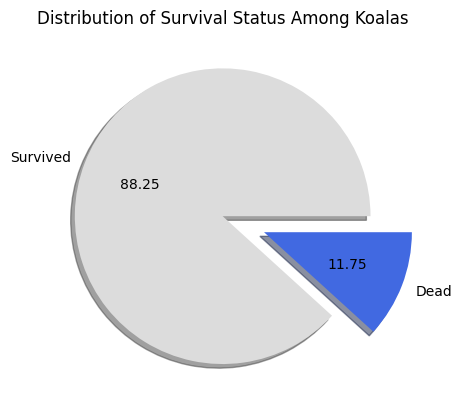

In [17]:
import matplotlib.pyplot as plt

# Map values to corresponding labels
df[' '] = df['Dead'].map({0: 'Survived', 1: 'Dead'})

# Plot pie chart
colors = ['gainsboro','royalblue']
myexplode = [0, 0.3]

# Plot pie chart with labeled data
df[' '].value_counts().plot.pie(explode=myexplode, colors=colors, autopct='%.2f', shadow=True)

# Add title
plt.title('Distribution of Survival Status Among Koalas')

# Show plot
plt.show()





<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>4. Data Cleaning</strong>
</div>


In [19]:
# Create a copy of df and save it into a variable called df_cleaned
df_cleaned=df.copy()


<Axes: >

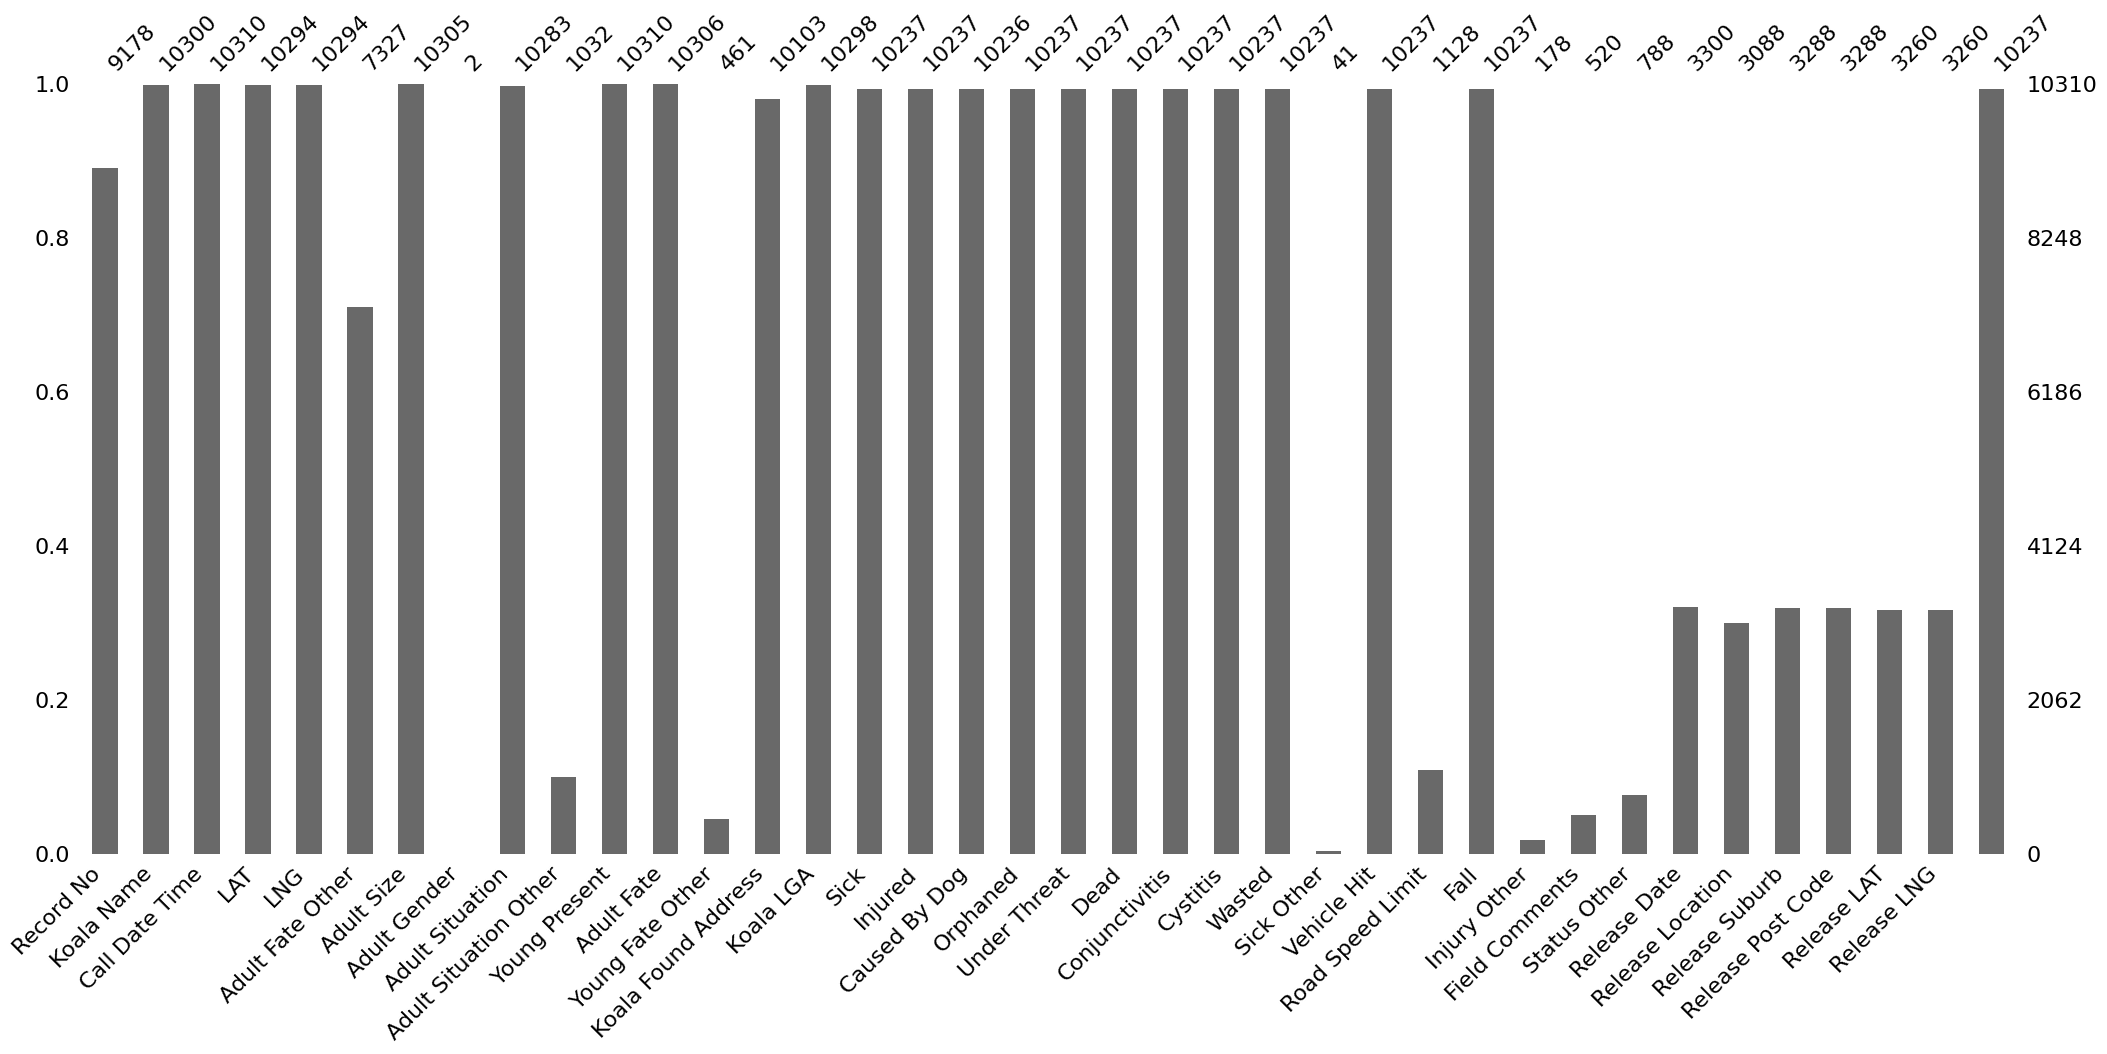

In [20]:
#  finding missing values
msno.bar(df_cleaned)

In [21]:
#Check for missing values in each column
columns_with_missing = df_cleaned.columns[df_cleaned.isna().any()]

# Print the names of columns with missing values
print("Columns with missing values:", columns_with_missing)

Columns with missing values: Index(['Record No', 'Koala Name', 'LAT', 'LNG', 'Adult Fate Other',
       'Adult Size', 'Adult Gender', 'Adult Situation',
       'Adult Situation Other', 'Adult Fate', 'Young Fate Other',
       'Koala Found Address', 'Koala LGA', 'Sick', 'Injured', 'Caused By Dog',
       'Orphaned', 'Under Threat', 'Dead', 'Conjunctivitis', 'Cystitis',
       'Wasted', 'Sick Other', 'Vehicle Hit', 'Road Speed Limit', 'Fall',
       'Injury Other', 'Field Comments', 'Status Other', 'Release Date',
       'Release Location', 'Release Suburb', 'Release Post Code',
       'Release LAT', 'Release LNG', ' '],
      dtype='object')


From MNSO barchart and the code afterwards, it's compeletly obvious that we have considerable missing values in some of the columns and "Adult Gender", "Wasted", "Sick Others" , 'Injury Other', 'Field Comments' and 'Status Other' column are almost emty.

In [22]:
#Dropping columns with high missing values
df_cleaned.drop(columns=['Record No','Injury Other', 'Adult Gender','Field Comments', 'Status Other','Sick Other'],axis=1,inplace=True)

In [23]:
# check the shape of cleaned df
df_cleaned.shape

(10310, 32)

In [24]:
# Check for duplicates
has_duplicates = df_cleaned.duplicated().any()

# Print the result
if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
    # Count duplicates
    num_duplicates = df_cleaned.duplicated().sum()
    print(f"Number of duplicates: {num_duplicates}")
else:
    print("There are no duplicate rows in the DataFrame.")


There are duplicate rows in the DataFrame.
Number of duplicates: 5


In [25]:
#removing duplicates
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Check for duplicates after removal
has_duplicates = df_cleaned.duplicated().any()

# Print the result
if has_duplicates:
    print("There were duplicate rows in the DataFrame, but they have been removed.")
    num_duplicates = df_cleaned.duplicated().sum()
    print(f"Number of duplicates removed: {num_duplicates}")
else:
    print("There were no duplicate rows in the DataFrame.")

There were no duplicate rows in the DataFrame.




<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>5. Heat Map</strong>
</div>



/var/folders/d8/q5b3_y7n6dq_c1pkqvfdw6n00000gn/T/ipykernel_47647/3935785176.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_cleaned.corr()))
/var/folders/d8/q5b3_y7n6dq_c1pkqvfdw6n00000gn/T/ipykernel_47647/3935785176.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_cleaned.corr(), mask=mask, cmap='Blues')


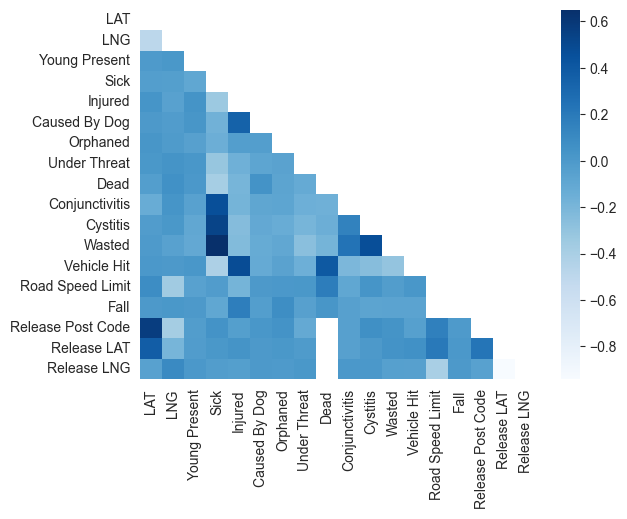

In [26]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# applying mask
mask = np.triu(np.ones_like(df_cleaned.corr()))

# Set style to remove grid lines
sns.set_style("white")

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df_cleaned.corr(), mask=mask, cmap='Blues')

# displaying heatmap
plt.show()


From above code is abvious that some of the most cor-related features are : (Road speed limit, LNG) , (Injured,sick) , (Injured, Under Threat), (Dead, sick), (Vehicle hit, Sick),(Vehicle hit,dead) (Under Threat, wasted), (Vehicle Hit, wasted) .


<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>5. Categorical Variable Analysis</strong>
</div>




In [27]:
#idenfying categorical columns
totalcat=df_cleaned.select_dtypes(include=['object'])
totalcat.head()

,Koala Name,Call Date Time,Adult Fate Other,Adult Size,Adult Situation,Adult Situation Other,Adult Fate,Young Fate Other,Koala Found Address,Koala LGA,Release Location,Release Suburb,
0,EOA,2016-01-01 00:00:00,RSPCA,Adult (More than 4kg),On ground,NaN,Hospital,NaN,32 Schonrock Street,Redland City Council,NaN,NaN,Survived
1,EOA,2016-01-01 00:00:00,RSPCA,Adult (More than 4kg),On ground,NaN,Hospital,NaN,30 Adelong Court,Moreton Bay Regional Council,NaN,NaN,Survived
2,ELANISHA,2016-01-02 00:00:00,NaN,Adult (More than 4kg),On ground,NaN,Hospital,NaN,M1,Gold Coast City Council,NaN,NaN,Dead
3,SAUCE,2016-01-03 00:00:00,separated from mum - into kindy,Sub-Adult (2-4kg),In captivity,Came in as pouch baby with mum on 3/6/2015,Hospital,NaN,Running Creek Road,Scenic Rim Regional Council,Tartar Creek Road,RATHDOWNEY,Survived
4,EOA,2016-01-03 00:00:00,NaN,Adult (More than 4kg),On ground,NaN,Hospital,NaN,Shakespeare Parade,Moreton Bay Regional Council,NaN,NaN,Survived


In [28]:
#print unique values of each categorical columns
unique_values_Adult_Fate_Other = df_cleaned['Adult Fate Other'].unique().tolist()
print("Adult Fate Other:", unique_values_Adult_Fate_Other)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

unique_values_Adult_Size = df_cleaned['Adult Size'].unique().tolist()
print("Adult Size:", unique_values_Adult_Size)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

unique_values_Adult_Situation = df_cleaned['Adult Situation'].unique().tolist()
print("Adult Situation:", unique_values_Adult_Situation)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

unique_values_Adult_Situation_Other = df_cleaned['Adult Situation Other'].unique().tolist()
print("Adult Situation Other", unique_values_Adult_Situation_Other)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

unique_values_Adult_Fate = df_cleaned['Adult Fate'].unique().tolist()
print("Adult Fate: ", unique_values_Adult_Fate)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

unique_values_Young_Fate_Other = df_cleaned['Young Fate Other'].unique().tolist()
print("Young Fate Other", unique_values_Young_Fate_Other)

print( "                                                                  ")
print( "                                                                  ")
print( "                           ♡ʕ•ᴥ•ʔ♡                                 ")
print( "                                                                  ")
print( "                                                                  ")

Adult Fate Other: ['RSPCA', nan, 'separated from mum - into kindy', 'vet', 'CWS', 'EVE', 'taken to Stafford Pet ER.', 'taken to Stafford Pet ER for assessment', 'euthanased at Underwood Vet', 'euthanased at local vet', 'euthanased at Manly Road vet.', 'taken to local vet, transported to CWS.', 'Stafford Pet ER', 'CWH', 'taken to local vet with mum', 'taken to local vet.', 'euthanased by Stafford Vet', 'RSPCA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'UQ Gatton', 'euthanased by local vet', "taken to French's Forest vet - euthanased.", 'taken to Pet ER for assessment', 'Manly Road Vet', "taken to French's Forest vet for assessment", 'taken to Manly Rd vet for assessment', 'taken to Frenchs Forest vet - euthanased.', 'Manly Rd Vet', 'taken to Yamanto Vet to be euthanased.', 'Oakey Vet', 'taken to vet for assessment', 'taken to local vet', 'taken to Stafford Pet ER', 'taken to Manly Rd vet', 'RPSCA', 'taken to Frenchs Forest vet', 'local vet', 'RSPCA Eumundi', 'taken to Frenchs Forest Vet', 'taken


<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>6. Numerical Variable Analysis</strong>
</div>




In [30]:
# Identifying numerical columns
totalnum = df_cleaned.select_dtypes(include=['int64', 'float64'])
totalnum.head()

,LAT,LNG,Sick,Injured,Caused By Dog,Orphaned,Under Threat,Dead,Conjunctivitis,Cystitis,Wasted,Vehicle Hit,Road Speed Limit,Fall,Release Post Code,Release LAT,Release LNG
0,-27.504285,153.241723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN
1,-27.130343,152.918048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN
2,-28.125917,153.465241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,100.0,0.0,NaN,NaN,NaN
3,-28.251415,152.891672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4287.0,-28.254046,152.880239
4,-27.290302,152.996642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN


In [31]:
unique_Dead = df_cleaned['Dead'].unique().tolist()
print("Dead:", unique_Dead)

Dead: [0.0, 1.0, nan]



<div style="background-color: darkblue; padding: 20px; color: white; text-align: center; font-size: 24px; border-radius: 10px; margin: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); border: 2px solid black;">
    <strong>7. Visualisation</strong>
</div>




**Injured and Hitted by car**

/var/folders/d8/q5b3_y7n6dq_c1pkqvfdw6n00000gn/T/ipykernel_47647/2600033631.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_dead_fatal['Road Speed Limit'], shade=True, color="r", alpha=0.8)
/var/folders/d8/q5b3_y7n6dq_c1pkqvfdw6n00000gn/T/ipykernel_47647/2600033631.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_dead_injured['Road Speed Limit'], shade=True, color="b", alpha=0.8)


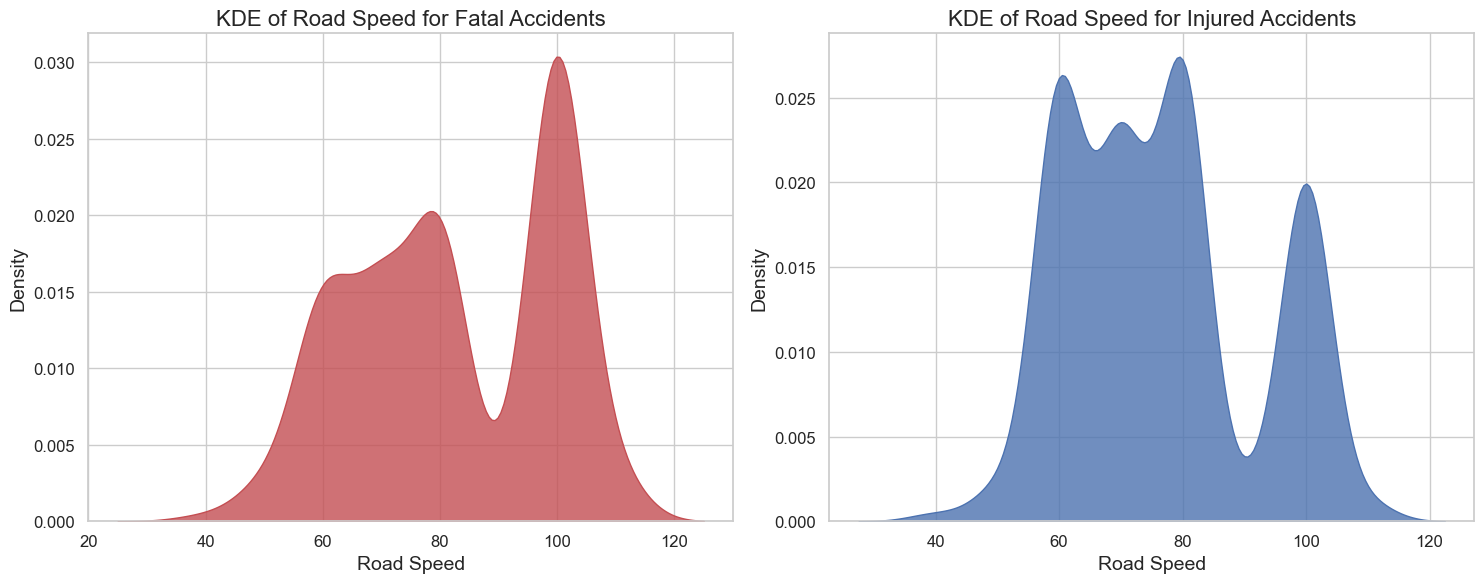

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the DataFrame to only include rows where 'dead' is 1
df_dead_fatal = df_cleaned[((df_cleaned['Vehicle Hit'] == 1) & (df_cleaned["Dead"] == 1))]
df_dead_injured = df_cleaned[((df_cleaned['Vehicle Hit'] == 1) & (df_cleaned["Injured"] == 1))]

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Create the first subplot for fatal accidents
plt.subplot(1, 2, 1)
sns.kdeplot(df_dead_fatal['Road Speed Limit'], shade=True, color="r", alpha=0.8)
plt.title('KDE of Road Speed for Fatal Accidents', fontsize=16)
plt.xlabel('Road Speed', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create the second subplot for injured accidents
plt.subplot(1, 2, 2)
sns.kdeplot(df_dead_injured['Road Speed Limit'], shade=True, color="b", alpha=0.8)
plt.title('KDE of Road Speed for Injured Accidents', fontsize=16)
plt.xlabel('Road Speed', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


From the above KDE plot it's obvious that the most fatal accidents happens in roads with speed limit of 100.

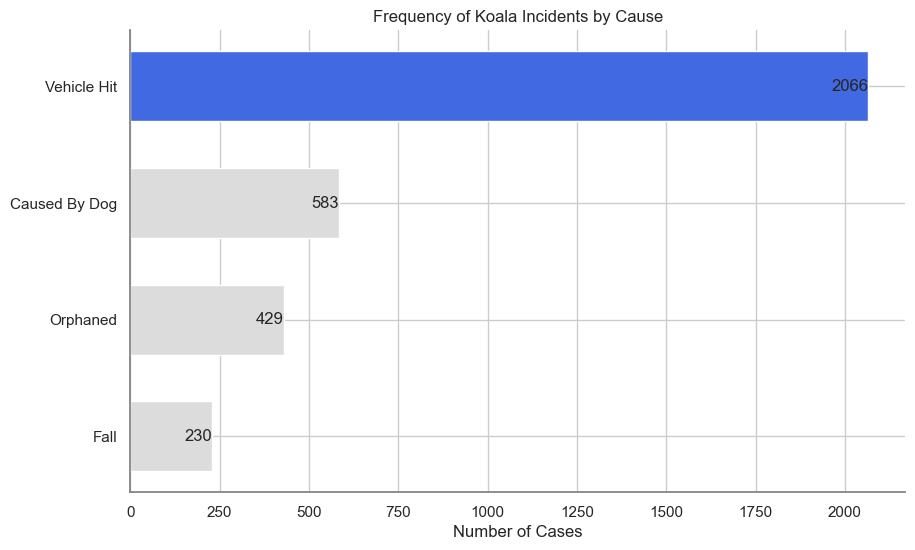

In [45]:



import pandas as pd
import matplotlib.pyplot as plt

# Sum the occurrences of each condition
condition = df_cleaned[['Caused By Dog', 'Fall', 'Orphaned', 'Vehicle Hit']].sum()

# Sort conditions for the plot
sorted_conditions = condition.sort_values(ascending=True)

# Define colors for the bars
colors = ['gainsboro', 'gainsboro','gainsboro', 'royalblue']

# Create the bar chart with thinner bars
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_conditions.index, sorted_conditions.values, color=colors, height=0.6)  # Adjust the height as desired for thinner bars

# Add text annotations to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='right')  # Adjusted ha parameter to 'right'

plt.xlabel('Number of Cases')
plt.title('Frequency of Koala Incidents by Cause')

# Removing unnecessary spines and setting color to grey
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

plt.show()



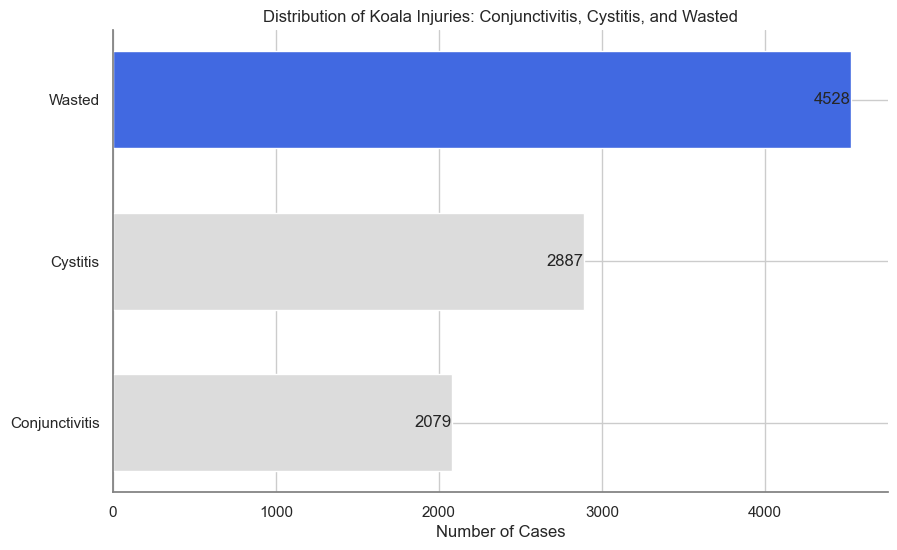

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Sum the occurrences of each condition
condition_sums = df_cleaned[['Conjunctivitis', 'Cystitis', 'Wasted',]].sum()

# Sort conditions for the plot
sorted_conditions = condition_sums.sort_values(ascending=True)

# Define colors for the bars
colors = ['gainsboro', 'gainsboro', 'royalblue']

# Create the bar chart with thinner bars
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_conditions.index, sorted_conditions.values, color=colors, height=0.6)  # Adjust the height as desired for thinner bars

# Add text annotations to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='right')  # Adjusted ha parameter to 'right'

plt.xlabel('Number of Cases')
plt.title('Distribution of Koala Injuries: Conjunctivitis, Cystitis, and Wasted')

# Removing unnecessary spines and setting color to grey
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

plt.show()


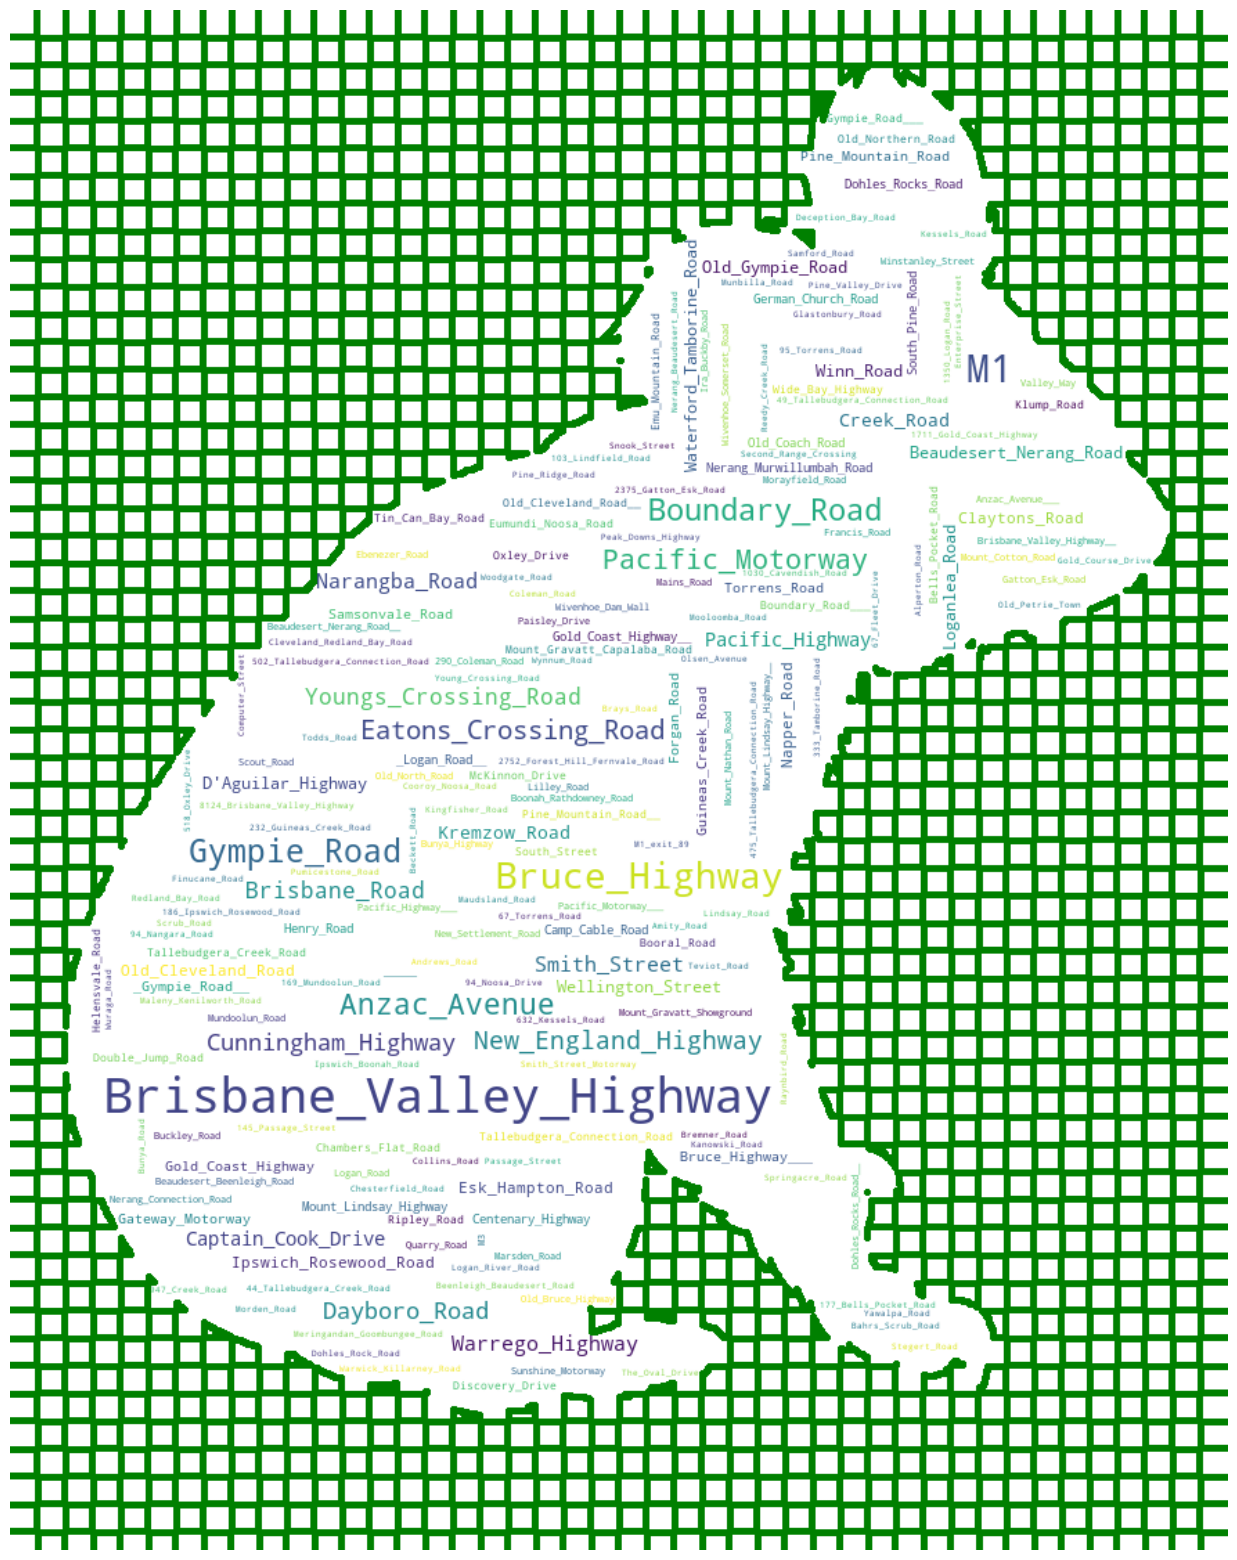

In [ ]:
#Word cloud of hitted by car koalas location

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



# Load an image to use as a mask
mask_image = np.array(Image.open("/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /koala_shadow.png"))

# Filter the DataFrame to include only rows where 'Vehicle Hit' equals 1
hit_by_vehicle = df_cleaned[df_cleaned['Vehicle Hit'] == 1]

# Combine all text from the 'Koala Found Address' column into a single string
# Replace spaces with underscores to keep words together
text = ' '.join(address.replace(' ', '_') for address in hit_by_vehicle['Koala Found Address'] if isinstance(address, str))

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=8, contour_color='green', mask=mask_image).generate(text)

# Display the generated image:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


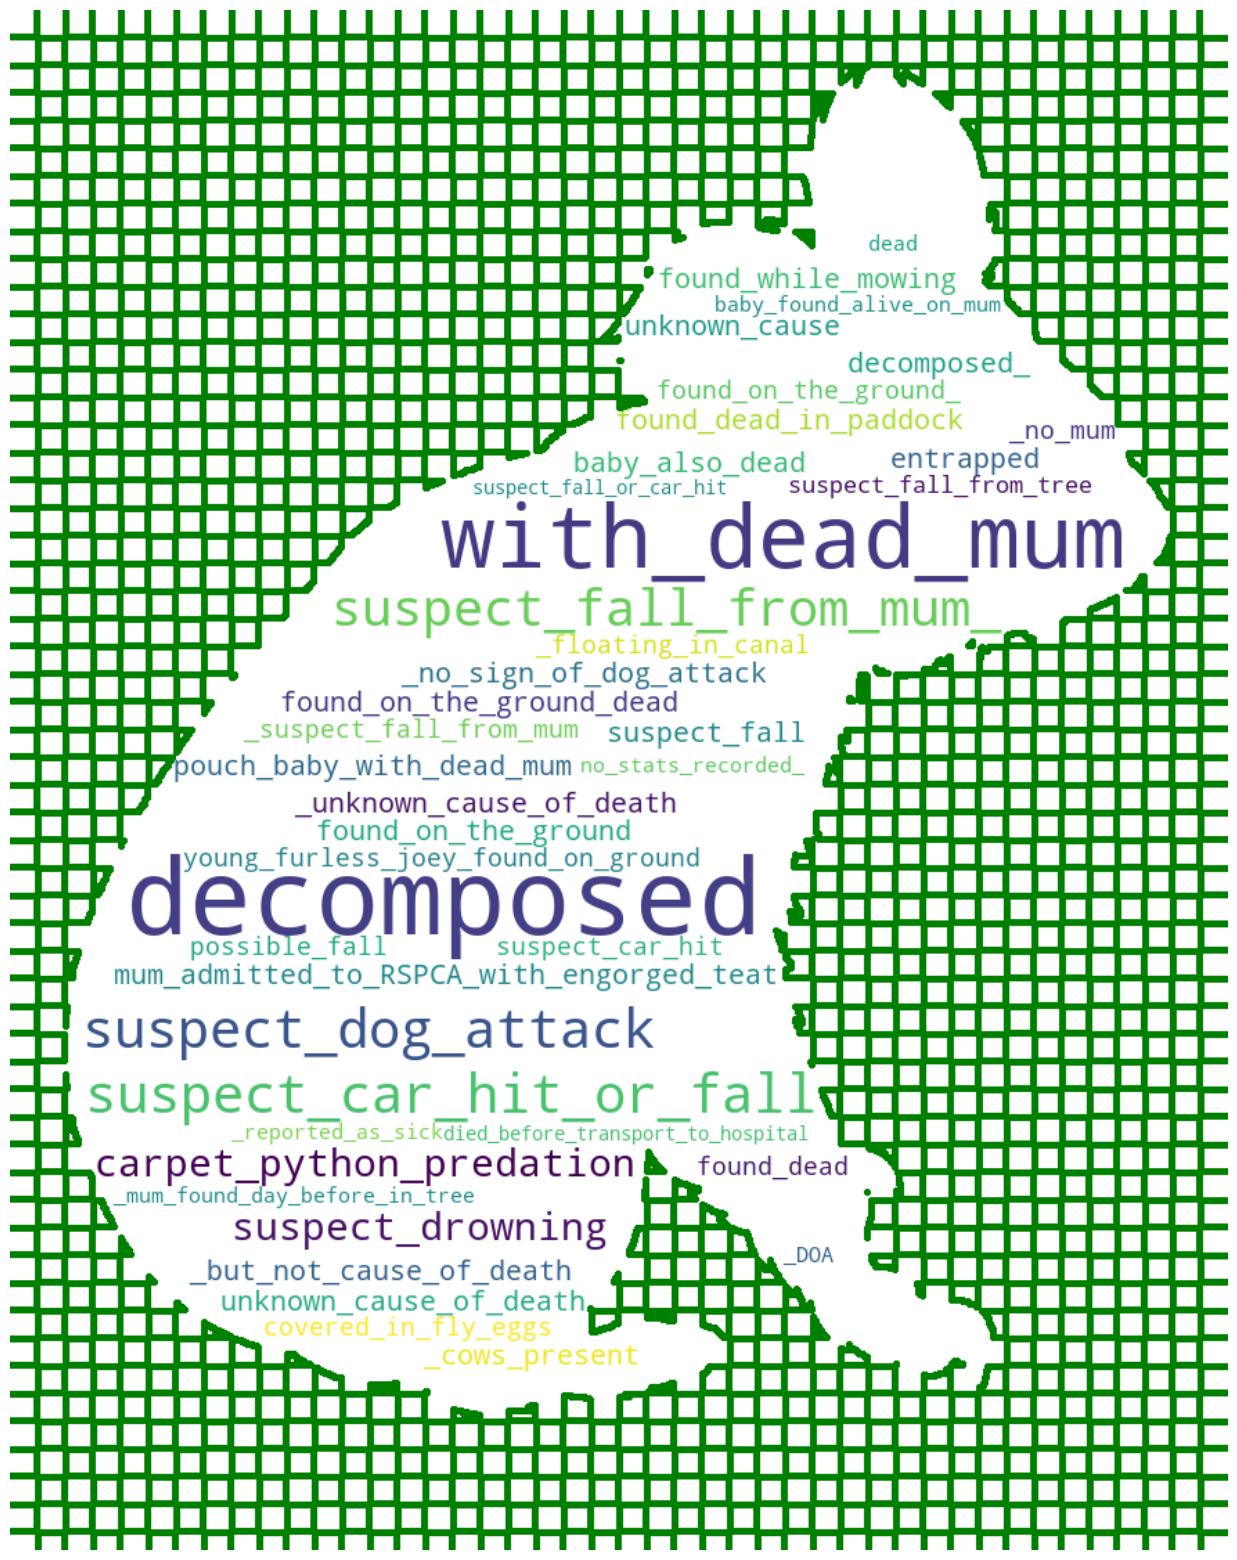

In [ ]:
#Word cloud of dead koalas

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# Load an image to use as a mask
mask_image = np.array(Image.open("/Users/yasamanmohammadi/Documents/UTS/Semester 3/Data visualisation and Narratives /Assignment 1- individual/koala_shadow.png"))

# Filter the DataFrame to include only rows where 'Vehicle Hit' equals 1
dead_koala = df_cleaned[df_cleaned['Dead'] == 1]

# Combine all text from the 'Koala Found Address' column into a single string
# Replace spaces with underscores to keep words together
text = ' '.join(address.replace(' ', '_') for address in dead_koala['Field Comments'] if isinstance(address, str))

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=8, contour_color='green', mask=mask_image).generate(text)

# Display the generated image:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
import pandas as pd
import plotly.express as px


# Calculate the frequency of each unique value in the 'Adult Situation Other' column
value_counts = df['Adult Situation Other'].value_counts().reset_index()
value_counts.columns = ['Adult Situation Other', 'Count']

# Select the top 30 most frequent values
top_10= value_counts.head(10)

# Create the interactive treemap
fig = px.treemap(top_10, path=['Adult Situation Other'], values='Count',
                 title='Top 10 Adult Situations')
fig.data[0].textinfo = 'label+text+value'
fig.show()
